In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import ttest_ind
from nltk.corpus import stopwords
from scipy.stats import normaltest
from scipy.stats import mannwhitneyu
from datetime import datetime

In [2]:
pwd

'C:\\Users\\ajdou\\Desktop\\Springboard\\assignments\\Capstone Project 2'

In [3]:
#load in dataset
df = pd.read_csv('data\combined.csv', index_col = 0)

In [4]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39105 entries, 0 to 39104
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    39105 non-null  object
 1   text     39104 non-null  object
 2   subject  39105 non-null  object
 3   date     39105 non-null  object
 4   label    39105 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [6]:
#drop single row with no text
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

Feature Extraction:

In [7]:
#word counts
df['text_wc']=df.text.apply(lambda x: len(x.split()))
df['title_wc'] = df.title.apply(lambda x: len(x.split()))

In [8]:
#character counts
df['text_cc'] = df['text'].str.len().astype(int)
df['title_cc'] = df['title'].str.len()

In [9]:
#average word length
def av_word_len(x):
    words = x.split()
    if len(words) > 0:
        return (sum(len(word) for word in words)/ len(words))
    else:
        return 0
df['av_word_len_text'] = df['text'].apply(av_word_len)
df['av_word_len_title'] = df['title'].apply(av_word_len)


In [10]:
#uppercase word counts
df['upper_text_wc'] = df.text.apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['upper_title_wc'] = df.title.apply(lambda x: len([x for x in x.split() if x.isupper()]))

In [11]:
#numerics count
df['numerics_text'] = df.text.apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['numerics_title'] = df.title.apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [12]:
#exclamation mark count
df['exclam_text'] = df.text.str.count('!')
df['exclam_title'] = df.title.str.count('!')

In [13]:
#question mark count
df['qmark_text'] = [df.text[i].count('?') for i in range(len(df))]
df['qmark_title'] = [df.title[i].count('?') for i in range(len(df))]

In [14]:
#period count
df['period'] =[df.text[i].count('.') for i in range(len(df))]

In [15]:
#@ count
df['at_sign'] = df.text.str.count('@')

In [16]:
#stopwords
stop = stopwords.words('english')
df['stop'] = df.text.apply(lambda x: len([x for x in x.split() if x in stop]))

In [17]:
#descriptive stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,39104.0,0.457958,0.498236,0.0,0.000000,0.000000,1.000000,1.0
text_wc,39104.0,396.662873,314.557359,0.0,207.000000,364.000000,507.000000,8135.0
title_wc,39104.0,11.954122,3.676347,1.0,9.000000,11.000000,14.000000,42.0
text_cc,39104.0,2415.401570,1940.539832,1.0,1255.000000,2201.000000,3071.000000,51794.0
title_cc,39104.0,76.837740,22.282825,8.0,62.000000,71.000000,87.000000,286.0
av_word_len_text,39104.0,5.079620,1.943200,0.0,4.857506,5.071717,5.270624,149.0
av_word_len_title,39104.0,5.591023,1.424357,3.0,5.000000,5.500000,6.066667,149.0
upper_text_wc,39104.0,6.805007,9.422848,0.0,2.000000,4.000000,9.000000,309.0
upper_title_wc,39104.0,1.538462,2.353555,0.0,0.000000,1.000000,2.000000,24.0
numerics_text,39104.0,1.990589,3.064325,0.0,0.000000,1.000000,3.000000,118.0


Exploratory Data Analysis

In [18]:
fake = df[df.label==1]
true = df[df.label==0]

In [19]:
#percentage of real vs fake articles
df.label.value_counts() / len(df) * 100

0    54.204173
1    45.795827
Name: label, dtype: float64

In [20]:
#breakdown of subjects by label
df.groupby(['label', 'subject']).label.count()

label  subject        
0      politicsNews       11216
       worldnews           9980
1      Government News      532
       News                9050
       US_News              783
       left-news            705
       politics            6838
Name: label, dtype: int64

In [21]:
#subject not useful for analysis
df.drop('subject', axis=1, inplace=True)

Text(0.5, 1.0, 'Title Character Count Distribution')

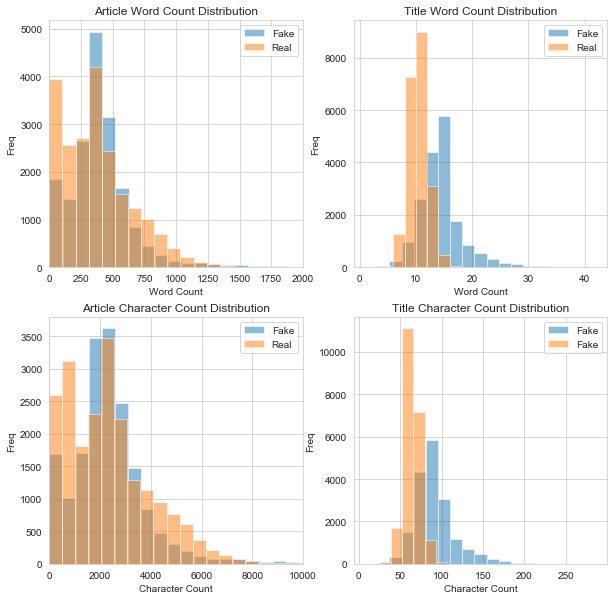

In [22]:
#histograms of character & word counts
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(fake['text_wc'], alpha=.5, bins=78, label='Fake')
plt.hist(true['text_wc'], alpha=.5, bins=50, label='Real')
plt.xlim([0,2000])
plt.legend()
plt.xlabel('Word Count')
plt.ylabel('Freq')
plt.title('Article Word Count Distribution')

plt.subplot(2,2,2)
plt.hist(fake['title_wc'], bins= 19,alpha=.5,label='Fake')
plt.hist(true['title_wc'], bins= 8,alpha=.5, label='Real')
plt.legend()
plt.xlabel('Word Count')
plt.ylabel('Freq')
plt.title('Title Word Count Distribution')

plt.subplot(2,2,3)
plt.hist(fake['text_cc'], bins=100, alpha=.5, label='Fake')
plt.hist(true['text_cc'], bins=58, alpha=.5, label='Real')
plt.xlim([0,10000])
plt.legend()
plt.xlabel('Character Count')
plt.ylabel('Freq')
plt.title('Article Character Count Distribution')

plt.subplot(2,2,4)
plt.hist(fake['title_cc'], bins=19, alpha=.5, label='Fake')
plt.hist(true['title_cc'], bins=8, alpha=.5, label='Fake')
plt.legend()
plt.xlabel('Character Count')
plt.ylabel('Freq')
plt.title('Title Character Count Distribution')

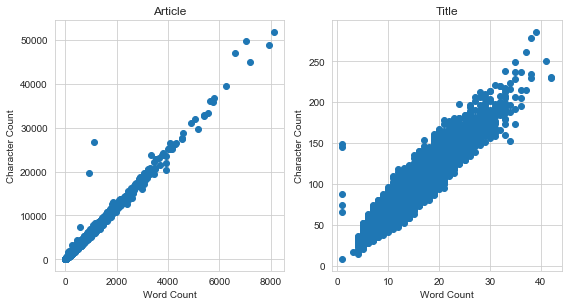

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.scatter(df.text_wc, df.text_cc)
plt.title('Article')
plt.xlabel('Word Count')
plt.ylabel('Character Count')

plt.subplot(2,2,2)
plt.scatter(df.title_wc, df.title_cc)
plt.title('Title')
plt.xlabel('Word Count')
plt.ylabel('Character Count')

plt.tight_layout()

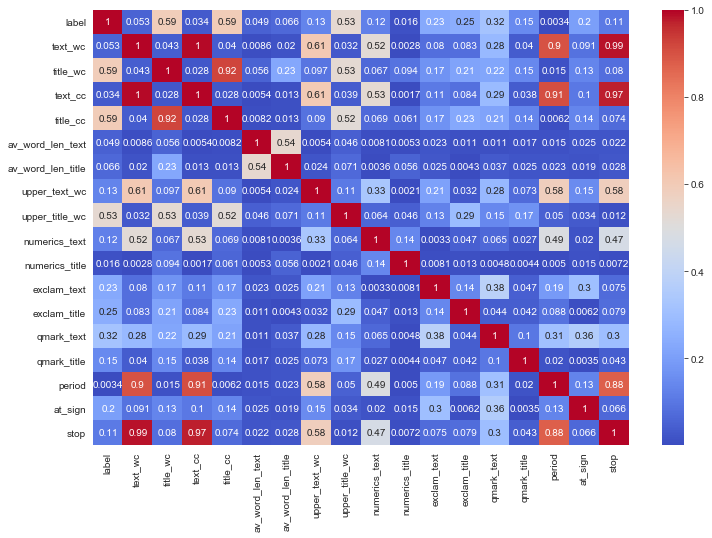

In [24]:
#correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)

In [25]:
#drop repeated information
df.drop(['text_cc', 'title_cc', 'period'], axis=1, inplace=True)

In [26]:
#convert number of stopwords to % stopwords
df['stop_p']= df.stop / df.text_wc
df.drop('stop', axis=1, inplace=True)

In [27]:
#check null values

In [28]:
#check null values
df.stop_p.isnull().sum()

447

In [29]:
df[df.stop_p.isnull()].head()

,title,text,date,label,text_wc,title_wc,av_word_len_text,av_word_len_title,upper_text_wc,upper_title_wc,numerics_text,numerics_title,exclam_text,exclam_title,qmark_text,qmark_title,at_sign,stop_p
10922,TAKE OUR POLL: Who Do You Think President Trum...,,"May 10, 2017",1,0,15,0.0,4.600000,0,3,0,0,0,0,0,1,0,NaN
11040,Joe Scarborough BERATES Mika Brzezinski Over “...,,"Apr 26, 2017",1,0,19,0.0,5.157895,0,2,0,0,0,1,0,0,0,NaN
11189,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,"Apr 6, 2017",1,0,13,0.0,5.692308,0,3,0,0,0,0,0,1,0,NaN
11224,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,"Apr 2, 2017",1,0,13,0.0,5.384615,0,4,0,0,0,0,0,0,0,NaN
11235,SHOCKER: Public School Turns Computer Lab Into...,,"Apr 1, 2017",1,0,11,0.0,6.909091,0,1,0,0,0,0,0,0,0,NaN


In [30]:
#fill null values from rows that have text_wc = 0
df['stop_p'] = df.stop_p.fillna(0)
#check null
df.stop_p.isnull().sum()

0

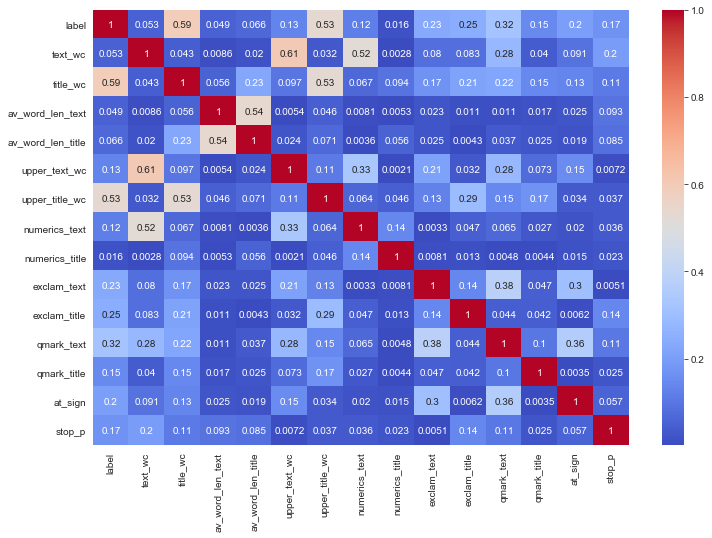

In [31]:
#correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)
plt.savefig('images/heatmap.jpg')

In [32]:
fake = df[df.label==1]
true = df[df.label==0]

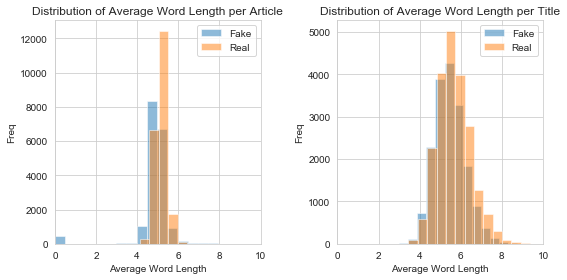

In [33]:
#histograms of average word length
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(fake['av_word_len_text'], bins=300, alpha=.5)
plt.hist(true['av_word_len_text'], bins= 15, alpha=.5)
plt.xlim([0,10])
plt.xlabel('Average Word Length')
plt.ylabel('Freq')
plt.title('Distribution of Average Word Length per Article')
plt.legend(['Fake', 'Real'])

plt.subplot(1,2,2)
plt.hist(fake['av_word_len_title'], bins=330, alpha=.5)
plt.hist(true['av_word_len_title'],bins=15, alpha=.5)
plt.xlim([0,10])
plt.xlabel('Average Word Length')
plt.ylabel('Freq')
plt.title('Distribution of Average Word Length per Title')
plt.legend(['Fake', 'Real'])

plt.tight_layout()

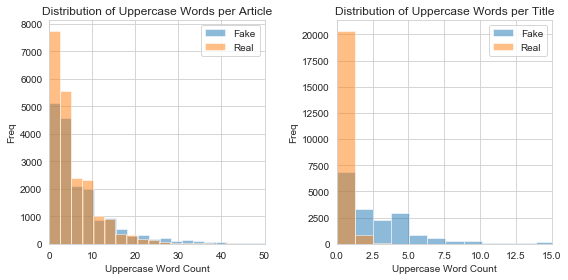

In [34]:
#histograms of uppercase words
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(fake['upper_text_wc'], bins=120, alpha=.5)
plt.hist(true['upper_text_wc'], bins=84,alpha=.5)
plt.xlim([0,50])
plt.legend(['Fake', 'Real'])
plt.xlabel('Uppercase Word Count')
plt.ylabel('Freq')
plt.title('Distribution of Uppercase Words per Article')

plt.subplot(1,2,2)
plt.hist(fake['upper_title_wc'], bins=19, alpha=.5)
plt.hist(true['upper_title_wc'], bins=4, alpha=.5)
plt.legend(['Fake', 'Real'])
plt.xlabel('Uppercase Word Count')
plt.ylabel('Freq')
plt.title('Distribution of Uppercase Words per Title')
plt.xlim([0,15])

plt.tight_layout()

Text(0, 0.5, 'Frequency')

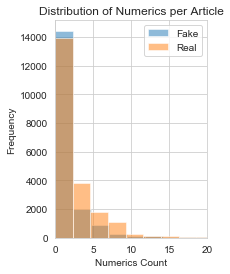

In [35]:
#histogram of numerics
plt.subplot(1,2,1)
plt.hist(fake.numerics_text, bins=50, label='Fake', alpha=.5)
plt.hist(true.numerics_text, bins=31, label='Real', alpha=.5)
plt.xlim([0,20])
plt.legend()
plt.title('Distribution of Numerics per Article')
plt.xlabel('Numerics Count')
plt.ylabel('Frequency')

In [36]:
#bar plots of punctuation in the title
def barplot(N, n_zeros, col):
    #bar heights
    true_bars = np.log(true['exclam_title'].value_counts()).to_list()
    for i in range(n_zeros):
        true_bars.append(0.0)
    fake_bars = np.log(fake[col].value_counts()).to_list()
    # Position of bars on x-axis
    ind = np.arange(N)
    #width of bar
    width = 0.3       

    # Plot
    plt.figure(figsize=(8,5))
    plt.bar(ind, fake_bars , width, label='Fake', alpha=.5)
    plt.bar(ind + width, true_bars, width, label='Real', alpha=.5)
    plt.ylabel('Log Frequency')
    plt.xlabel('Count')
    plt.title(col)
    plt.xticks(ind + width / 2, ind)
    plt.legend()

Text(0.5, 1.0, 'Numerics per Title')

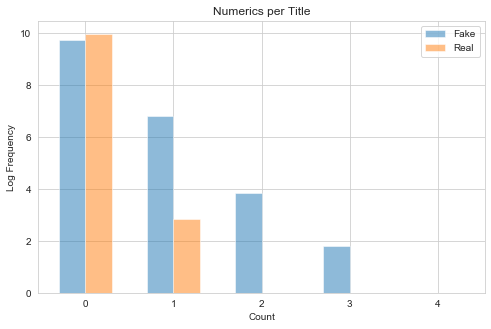

In [37]:
barplot(5,2,'numerics_title')
plt.title('Numerics per Title')

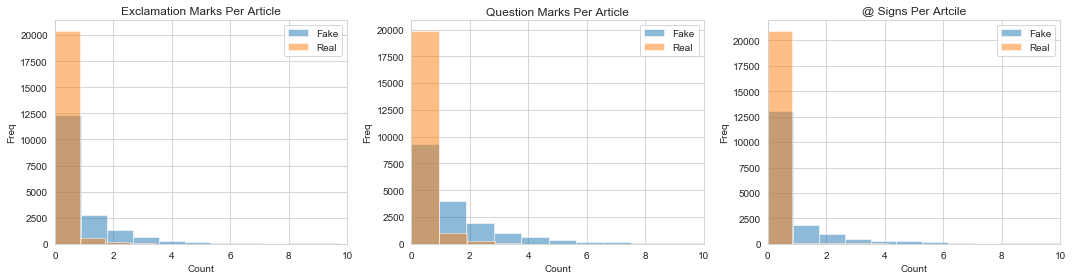

In [38]:
#distribution of punctuation
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
plt.hist(fake['exclam_text'], bins=150, alpha=.5)
plt.hist(true['exclam_text'], bins=14, alpha=.5)
plt.xlim([0,10])
plt.xlabel('Count')
plt.ylabel('Freq')
plt.title('Exclamation Marks Per Article')
plt.legend(['Fake', 'Real'])


plt.subplot(1,3,2)
plt.hist(fake['qmark_text'], bins=100, alpha=.5)
plt.hist(true['qmark_text'], bins=60, alpha=.5)
plt.xlim([0,10])
plt.xlabel('Count')
plt.ylabel('Freq')
plt.title('Question Marks Per Article')
plt.legend(['Fake', 'Real'])


plt.subplot(1,3,3)
plt.hist(fake['at_sign'], bins=100, alpha=.5)
plt.hist(true['at_sign'], bins=23, alpha=.5)
plt.xlim([0,10])
plt.xlabel('Count')
plt.ylabel('Freq')
plt.title('@ Signs Per Artcile')
plt.legend(['Fake', 'Real'])

plt.tight_layout()

Text(0.5, 1.0, 'Question Marks per Title')

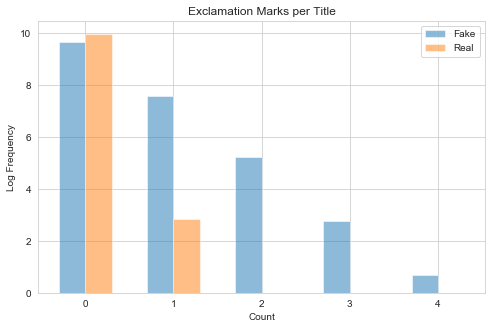

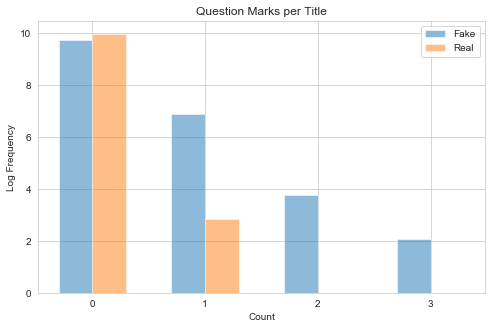

In [39]:
#barplots of punctuation in the title
barplot(5,2,'exclam_title')
plt.title('Exclamation Marks per Title')
barplot(4,1,'qmark_title')
plt.title('Question Marks per Title')

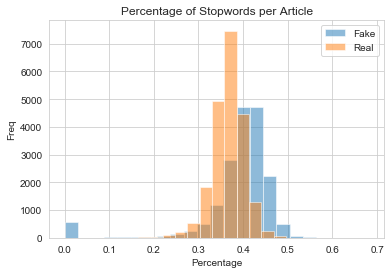

In [40]:
#percentage of stop words per article
plt.hist(fake['stop_p'], bins=23, alpha=.5)
plt.hist(true['stop_p'], bins=19,alpha=.5)
plt.xlabel('Percentage')
plt.ylabel('Freq')
plt.title('Percentage of Stopwords per Article')
plt.legend(['Fake', 'Real'])

Hypothesis Testing

In [41]:
#feature means grouped by label
df.groupby('label').mean()

,text_wc,title_wc,av_word_len_text,av_word_len_title,upper_text_wc,upper_title_wc,numerics_text,numerics_title,exclam_text,exclam_title,qmark_text,qmark_title,at_sign,stop_p
label,,,,,,,,,,,,,,
0,381.431921,9.951217,5.167209,5.677599,5.644839,0.386394,2.336384,0.049019,0.062134,0.000896,0.099453,0.006605,0.038073,0.366795
1,414.690306,14.324771,4.975949,5.488551,8.178189,2.902055,1.581304,0.056399,0.723420,0.131394,1.202256,0.060922,1.351072,0.389405


In [42]:
#on average...
#fake articles have higher word counts but shorter words
#fake artciles have more uppercase words, punctuation, and stopwords
#real articles have more numerics

In [43]:
#test if distributions are normal
for col in df.columns[4:17]:
    print(col+':','pval =', normaltest(df[col])[1])

text_wc: pval = 0.0
title_wc: pval = 0.0
av_word_len_text: pval = 0.0
av_word_len_title: pval = 0.0
upper_text_wc: pval = 0.0
upper_title_wc: pval = 0.0
numerics_text: pval = 0.0
numerics_title: pval = 0.0
exclam_text: pval = 0.0
exclam_title: pval = 0.0
qmark_text: pval = 0.0
qmark_title: pval = 0.0
at_sign: pval = 0.0


In [44]:
#distributions are not normal, must apply nonparametric tests
#Mann Whitney U test
test_stats = {}
for col in df.columns[4:18]:
    stat, pval = mannwhitneyu(fake[col], true[col])
    test_stats[col] = [stat,pval]
pd.DataFrame(test_stats, index=['u_statistic', 'p_value']).T

,u_statistic,p_value
text_wc,177604975.0,3.141590e-28
title_wc,49189698.0,0.000000e+00
av_word_len_text,109232149.5,0.000000e+00
av_word_len_title,160428263.0,6.635840e-154
upper_text_wc,165549143.5,2.667977e-106
upper_title_wc,55925001.5,0.000000e+00
numerics_text,152020611.5,2.905601e-270
numerics_title,188761471.0,7.242308e-03
exclam_text,137122963.5,0.000000e+00
exclam_title,167407410.5,0.000000e+00


In [45]:
#convert date column to datetime object
df['date']=pd.to_datetime(df.date, errors='coerce')

In [46]:
#check for null values
df.date.isnull().sum()

6

In [47]:
#fill na values with most frequent date
df.date = df.date.fillna(df.date.value_counts().index[0])

In [48]:
#extract day of the week, year, month from date 
df['day'] = df.date.apply(datetime.weekday).map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})
df['year'] = [x.year for x in df.date]
df['month'] = [x.month for x in df.date]
#drop date column
df.drop('date', axis=1, inplace=True)

In [49]:
#check year frequencies grouped by label
df.groupby(['label', 'year']).title.count()

label  year
0      2016     4697
       2017    16499
1      2015     1645
       2016     9443
       2017     6785
       2018       35
Name: title, dtype: int64

In [50]:
#year not applicable for analysis
df.drop('year', axis=1, inplace=True)

In [51]:
#check week day frequencies grouped by label
df.groupby(['label','day']).title.count().sort_values()

label  day
0      Sat    1189
       Sun    1419
1      Sat    2273
       Sun    2374
       Mon    2514
       Fri    2644
       Tue    2647
       Thu    2722
       Wed    2734
0      Mon    3045
       Fri    3668
       Tue    3731
       Thu    4049
       Wed    4095
Name: title, dtype: int64

In [52]:
#more fake news published on weekends
#create weekend column from day of the week column
df['weekend'] = df.day.apply(lambda x: 1 if x in ['Sat', 'Sun'] else 0)
#drop week_day column
df.drop('day', axis=1, inplace=True)

Text(0.5, 0, 'Day of Week Published')

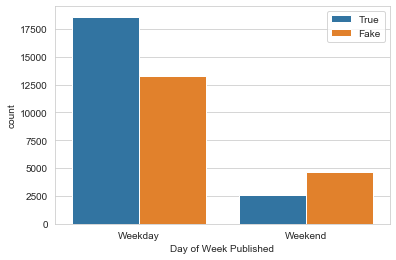

In [90]:
#visualize weekend distribution with barplot
sns.countplot(df.weekend, hue=df.label)
plt.legend(['True', 'Fake'])
plt.xticks(ticks=[0,1], labels=['Weekday', 'Weekend'])
plt.xlabel('Day of Week Published')

In [78]:
#check month frequencies grouped by label
month_group = df.groupby(['label','month']).title.count().sort_values()
month_group

label  month
0      7         875
       5         898
       4         911
       8         914
       6         973
       1         994
       2        1017
       3        1168
1      12       1216
       11       1302
       9        1347
       10       1443
       8        1448
       6        1459
       7        1462
       4        1574
       2        1593
       5        1668
       3        1693
       1        1703
0      12       2838
       9        3408
       10       3489
       11       3711
Name: title, dtype: int64

In [79]:
#calculate percentage per month per label
true_months =(month_group[0]/len(df[df.label==0])).sort_index().to_list()
fake_months = (month_group[1]/len(df[df.label==1])).sort_index().to_list()
pd.DataFrame([true_months, fake_months], index=['True', 'Fake'], columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
True,0.046896,0.047981,0.055105,0.042980,0.042366,0.045905,0.041281,0.043121,0.160785,0.164607,0.175080,0.133893
Fake,0.095097,0.088955,0.094539,0.087894,0.093143,0.081472,0.081639,0.080858,0.075218,0.080579,0.072705,0.067903


In [80]:
#more true news written at the end of the year
#create column that is True if article was written from september to december
df['Sep_Dec'] = df.month.apply(lambda x: 1 if x in([9,10,11,12]) else 0)
#drop month column
df.drop('month', axis=1, inplace=True)

Text(0.5, 0, 'Time of Year Published')

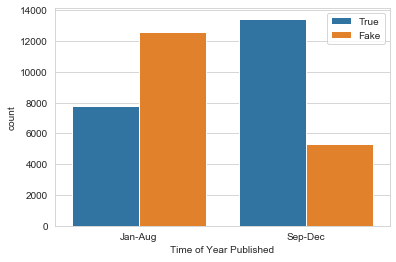

In [93]:
#barplot of time of year article was published
sns.countplot(df['Sep_Dec'], hue=df.label)
plt.legend(['True', 'Fake'])
plt.xticks(ticks=[0,1],labels=['Jan-Aug', 'Sep-Dec'])
plt.xlabel('Time of Year Published')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39104 entries, 0 to 39103
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              39104 non-null  object 
 1   text               39104 non-null  object 
 2   label              39104 non-null  int64  
 3   text_wc            39104 non-null  int64  
 4   title_wc           39104 non-null  int64  
 5   av_word_len_text   39104 non-null  float64
 6   av_word_len_title  39104 non-null  float64
 7   upper_text_wc      39104 non-null  int64  
 8   upper_title_wc     39104 non-null  int64  
 9   numerics_text      39104 non-null  int64  
 10  numerics_title     39104 non-null  int64  
 11  exclam_text        39104 non-null  int64  
 12  exclam_title       39104 non-null  int64  
 13  qmark_text         39104 non-null  int64  
 14  qmark_title        39104 non-null  int64  
 15  at_sign            39104 non-null  int64  
 16  stop_p             391

In [95]:
df

,title,text,label,text_wc,title_wc,av_word_len_text,av_word_len_title,upper_text_wc,upper_title_wc,numerics_text,numerics_title,exclam_text,exclam_title,qmark_text,qmark_title,at_sign,stop_p,weekend,Sep_Dec
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,495,12,4.804040,5.583333,5,0,4,0,6,0,9,0,13,0.375758,1,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,305,8,5.213115,7.625000,3,0,0,0,0,0,0,0,0,0.390164,1,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,580,15,5.168966,5.000000,42,0,0,0,2,0,4,0,14,0.360345,1,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,444,14,5.180180,4.571429,5,1,5,0,0,0,1,0,8,0.360360,0,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,420,11,4.554762,5.363636,0,0,0,0,0,0,0,0,0,0.464286,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39099,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,0,463,9,5.008639,5.888889,14,2,3,0,0,0,0,0,0,0.386609,0,0
39100,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",0,122,7,5.336066,6.571429,0,0,0,0,0,0,0,0,0,0.368852,0,0
39101,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,0,317,7,5.044164,6.142857,4,0,3,0,0,0,0,0,0,0.400631,0,0
39102,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,0,202,9,4.806931,5.888889,0,0,0,0,0,0,0,0,0,0.400990,0,0


In [96]:
df.to_csv('data/added_features.csv')